In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from itertools import combinations 
import matplotlib.pyplot as plt

In [7]:
#**************** Read the file ********************
df_training = pd.DataFrame.from_csv("SFE_Dataset copy.csv")
Training = df_training.as_matrix(columns = None)
Features = df_training.columns
size_all = Training.shape
print(size_all)

(473, 18)


C: -3.161405
N: 2.837669
P: 308.865088
S: -65.641981
V: -7.019443
Ni: 0.990553
Nb: -13.107006
Al: 4.297066
Ti: -76.223644
Fe: -0.111120
Hf: -19.117430
Mo: 1.374081
Mn: 0.199877
Co: -0.768799
Si: -2.817920
Cr: 0.002089
Cu: 3.778270
Intercept:  26.4733772242
Mean-square-error:  142.677709324


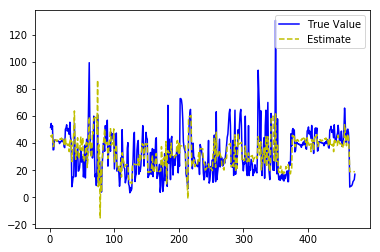

In [40]:
### Regression using all features
reg_all = linear_model.LinearRegression()
reg_all.fit (Training[:,0:-1], Training[:,-1].T)
esti = reg_all.predict(Training[:,0:-1])
for i in range(size_all[1]-1):
    print("%s: %f" %(Features[i],reg_all.coef_[i]))
print("Intercept: ",reg_all.intercept_)
mse = mean_squared_error(Training[:,-1],reg_all.predict(Training[:,0:-1]))
print("Mean-square-error: ",mse)
plt.plot(range(1,size_all[0]+1),Training[:,-1],'b-',label='True Value')
plt.plot(range(1,size_all[0]+1),esti,'y--',label='Estimate')
plt.legend(loc='upper right')
plt.show()

C: -6.834814.
N: 6.985100.
Ni: -0.800384.
Fe: -1.148168.
Mn: -1.242495.
Si: -3.941509.
Cr: -1.063272.
Intercept:  143.583979771
Mean-square-error:  215.977046338


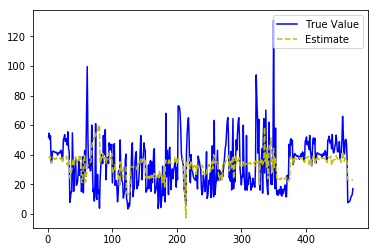

In [57]:
### delete the features of which the values are zero of more than 60% samples
delete_feature = []
for i in range(size_all[1]-1):
    n = 0 
    for j in range(size_all[0]):
        if Training[j,i] == 0 :
            n += 1
    if n >= 0.55*size_all[0]:
        delete_feature.append(i)
Feature_2 = np.delete(Features,delete_feature) 
Training_2 = np.delete(Training,delete_feature,axis = 1)
size_2 = Training_2.shape
reg_2 = linear_model.LinearRegression()
reg_2.fit (Training_2[:,0:-1], Training_2[:,-1].T)
esti_2 = reg_2.predict(Training_2[:,0:-1])
for i in range(size_2[1]-1):
    print("%s: %f." %(Feature_2[i],reg_2.coef_[i]))
print("Intercept: ",reg_2.intercept_)
mse_2 = mean_squared_error(Training_2[:,-1],reg_2.predict(Training_2[:,0:-1]))
print("Mean-square-error: ",mse_2)
plt.plot(range(1,size_2[0]+1),Training_2[:,-1],'b-',label='True Value')
plt.plot(range(1,size_2[0]+1),esti_2,'y--',label='Estimate')
plt.legend(loc='upper right')
plt.show()

(211, 8)
C: -25.895882.
N: 19.049820.
Ni: -1.835255.
Fe: -4.062992.
Mn: -3.046137.
Si: -7.447996.
Cr: -4.076263.
Intercept:  410.126432958
Mean-square-error:  53.2570998679


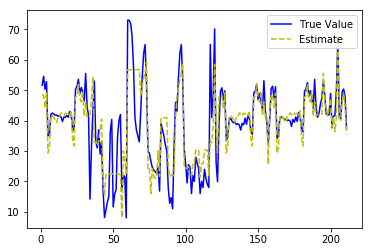

In [59]:
### delete the samples in which there are still features valued zero
delete_sample = []
for j in range(size_2[0]):
    if 0 in Training_2[j,0:-1]:
        delete_sample.append(j)
Training_3 = np.delete(Training_2,delete_sample,axis = 0)
size_3 = Training_3.shape
print(size_3)
reg_3 = linear_model.LinearRegression()
reg_3.fit (Training_3[:,0:-1], Training_3[:,-1].T)
for i in range(size_3[1]-1):
    print("%s: %f." %(Feature_2[i],reg_3.coef_[i]))
print("Intercept: ",reg_3.intercept_)
esti_3 = reg_3.predict(Training_3[:,0:-1])
mse_3 = mean_squared_error(Training_3[:,-1],reg_3.predict(Training_3[:,0:-1]))
print("Mean-square-error: ",mse_3)
plt.plot(range(1,size_3[0]+1),Training_3[:,-1],'b-',label='True Value')
plt.plot(range(1,size_3[0]+1),esti_3,'y--',label='Estimate')
plt.legend(loc='upper right')
plt.show()

In [78]:
### exhaustive search
def R_square(reg,training_set,f_select=None):
    ### R^2 statistic
    m = training_set.shape
    if f_select == None:
        rss = mean_squared_error(training_set[:,-1],reg.predict(training_set[:,0:-1]))
        tss = mean_squared_error(training_set[:,-1],np.mean(training_set[:,-1])*np.ones((m[0],1)))
        R = 1 - rss/tss
    else:
        rss = mean_squared_error(training_set[:,-1],reg.predict(training_set[:,f_select]))
        tss = mean_squared_error(training_set[:,-1],np.mean(training_set[:,-1])*np.ones((m[0],1)))
        R = 1 - rss/tss
    return R
def exhaustive(training_set,n):
    m = training_set.shape
    if type(n) != int:
        print("The number of features selected should be an Integer.")
    elif n > m[1]-1:
        print("The number of features selected is out of range.")
    else:
        score = 0
        F_comb = list(combinations(range(0,m[1]-1), n))
        reg = linear_model.LinearRegression()
        for f_select in F_comb:
            reg.fit (training_set[:,f_select], training_set[:,-1].T)
            s = R_square(reg,training_set,f_select)
            if score < s:
                score = s
                mse = mean_squared_error(training_set[:,-1],reg.predict(training_set[:,f_select]))
                min_err_f = [f_select]       
    return Feature_2[min_err_f],score,mse,min_err_f
for i in range(1,size_3[1]):
    fea,r,mserror,f_index = exhaustive(Training_3,i)
    fea_name = []
    for j in range(0,i):
        fea_name.append(fea[j])
    print("Choose %i features"%i)
    print("Selected features:",fea_name)
    print("R-square statistic:",r)
    print("Mean-square-error:",mserror)

Choose 1 features
Selected features: ['Ni']
R-square statistic: 0.497966097499
Mean-square-error: 84.6691202691
Choose 2 features
Selected features: ['N', 'Ni']
R-square statistic: 0.553513906031
Mean-square-error: 75.300860361
Choose 3 features
Selected features: ['Fe', 'Mn', 'Cr']
R-square statistic: 0.594488814583
Mean-square-error: 68.390352041
Choose 4 features
Selected features: ['C', 'Fe', 'Mn', 'Cr']
R-square statistic: 0.632185316251
Mean-square-error: 62.0327542422
Choose 5 features
Selected features: ['C', 'Fe', 'Mn', 'Si', 'Cr']
R-square statistic: 0.662149511511
Mean-square-error: 56.9792269015
Choose 6 features
Selected features: ['C', 'Ni', 'Fe', 'Mn', 'Si', 'Cr']
R-square statistic: 0.675079168492
Mean-square-error: 54.7986118543
Choose 7 features
Selected features: ['C', 'N', 'Ni', 'Fe', 'Mn', 'Si', 'Cr']
R-square statistic: 0.684219351783
Mean-square-error: 53.2570998679


N: 27.741396.
Ni: 1.954208.
Fe: -0.392103.
Mn: -0.359948.
Si: -5.943278.
Intercept:  41.0295404746
R-square statistic: 0.581761674464
Mean-square-error: 70.5368121745


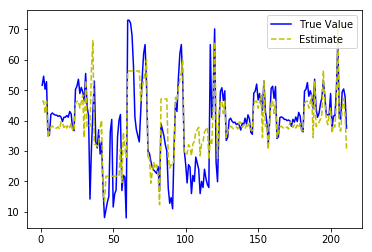

Ni: -2.231476.
Fe: -4.394086.
Mn: -3.038416.
Si: -7.686720.
Cr: -4.210372.
Intercept:  439.832154699
R-square statistic: 0.647572652832
Mean-square-error: 59.4376461327


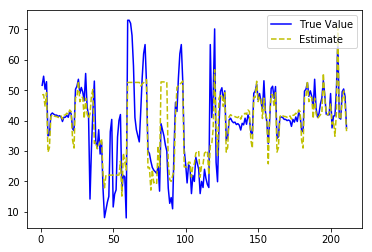

C: -39.992424.
Fe: -2.444142.
Mn: -0.958629.
Si: -6.714160.
Cr: -2.626538.
Intercept:  252.066483628
R-square statistic: 0.662149511511
Mean-square-error: 56.9792269015


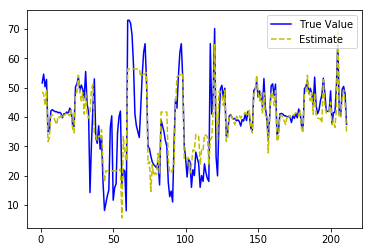

In [84]:
### Linear Regression
def linearR(training_set,selected_feature):
    m = training_set.shape
    reg = linear_model.LinearRegression()
    reg.fit (training_set[:,selected_feature], training_set[:,-1].T)
    mse = mean_squared_error(training_set[:,-1],reg.predict(training_set[:,selected_feature]))
    R = R_square(reg,training_set,selected_feature)
    for i in range(len(selected_feature)):
        print("%s: %f." %(Feature_2[selected_feature[i]],reg.coef_[i]))
    print("Intercept: ",reg.intercept_)
    print("R-square statistic:",R)
    print("Mean-square-error:",mse)
    esti = reg.predict(training_set[:,selected_feature])
    plt.plot(range(1,m[0]+1),training_set[:,-1],'b-',label='True Value')
    plt.plot(range(1,m[0]+1),esti,'y--',label='Estimate')
    plt.legend(loc='upper right')
    plt.show()
    return 
f_set_1 = [1,2,3,4,5]
f_set_2 = [2,3,4,5,6]
f_set_3 = [0,3,4,5,6]
linearR(Training_3,f_set_1)
linearR(Training_3,f_set_2)
linearR(Training_3,f_set_3)

In [88]:
### BLUE
def BLUE(training_set,selected_feature):
    m = training_set.shape
    one = np.ones([m[0],1])
    A = np.hstack((training_set[:,selected_feature],one))
    s = np.linalg.inv(np.dot(A.T,A))
    s = np.dot(s,A.T)
    s = np.dot(s,training_set[:,-1])
    for i in range(len(selected_feature)):
        print("%s: %f." %(Feature_2[selected_feature[i]],s[i]))
    print("Intercept: ",s[-1])
    print()
    return 
BLUE(Training_3,f_set_1)
BLUE(Training_3,f_set_2)
BLUE(Training_3,f_set_3)

N: 27.741396.
Ni: 1.954208.
Fe: -0.392103.
Mn: -0.359948.
Si: -5.943278.
Intercept:  41.0295404746

Ni: -2.231476.
Fe: -4.394086.
Mn: -3.038416.
Si: -7.686720.
Cr: -4.210372.
Intercept:  439.832154694

C: -39.992424.
Fe: -2.444142.
Mn: -0.958629.
Si: -6.714160.
Cr: -2.626538.
Intercept:  252.066483628

